In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =9
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 8.5 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 8.5 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 11 # Overall title
plt.rcParams["axes.labelsize"] = 11 # Axes labels

In [3]:
out=pt.import_excel(r'../LEPR_Wet_Stitched_April2023_Norm100Anhydrs.xlsx', sheet_name='Cpx-Liq')
myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']
cpx_Glass=out['my_input']
Cpx_Glass=cpx_Glass
notinLEPR= cpx_Glass['Citation_x'].str.contains('notinLEPR')
notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
newMask=notinLEPR|notinKeith
OldMask=(~newMask)&(cpx_Glass['P_kbar_x']<17)
newMask=newMask.fillna(False)

mask_1GPa=cpx_Glass['P_kbar_x']<17
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)


C:\Users\penny\AppData\Local\Temp\ipykernel_27560\386116709.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))


In [4]:
rand_choice=cpx_Glass.loc[Press_new&(Cpx_Glass['H2O_Liq']>0)].index.values
choose=np.random.choice(rand_choice, 50)
np.sort(choose)

array([367, 373, 378, 382, 400, 415, 423, 440, 443, 452, 479, 486, 490,
       492, 495, 497, 510, 534, 546, 557, 563, 580, 593, 603, 628, 646,
       654, 657, 667, 667, 667, 672, 680, 698, 703, 705, 716, 728, 763,
       772, 785, 803, 818, 845, 845, 848, 852, 870, 870, 880], dtype=int64)

In [5]:
Filt2=[392, 398, 434, 450, 457, 468, 486, 488, 489, 502, 520, 526, 548, 561,
       564, 572, 599, 601, 603, 606, 611, 636, 637, 642, 645, 646,
       648, 649, 660, 673, 679, 689, 696, 730, 735, 739, 755, 793, 795,
       799, 805, 806, 819, 825, 826, 831, 844, 879, 885,  888]

In [6]:
# pasted results from cell 4 for consistency
Filt=[392, 398, 434, 450, 457, 468, 486, 488, 489, 502, 520, 526, 548, 561,
       564, 572, 599, 603,  611, 636, 637,  645, 
        660, 673, 679, 689, 696, 730, 739, 755, 793, 795,
       799, 805, 806,  825, 826, 831, 844, 879,  888]

In [7]:
len(Filt)

41

(-100.0, 100.0)

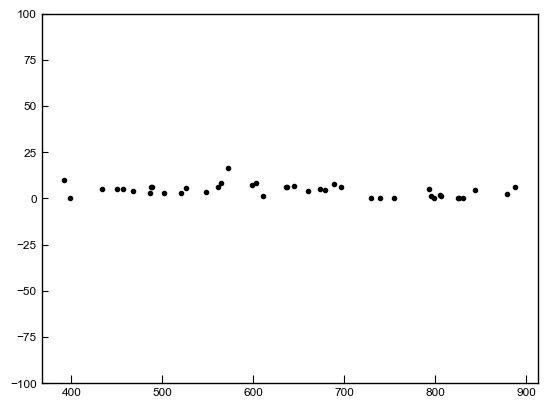

In [8]:
plt.plot(Filt, Cpx_Glass['H2O_Liq'].loc[Filt], '.k')
plt.ylim([-100, 100])

In [9]:
myLiquids_Filt=myLiquids1.loc[Filt].reset_index(drop=True)
myCpxs_Filt=myCpxs1.loc[Filt].reset_index(drop=True)
Cpx_Glass_Filt=Cpx_Glass.loc[Filt].reset_index(drop=True)

In [10]:
delta_H_lin=np.linspace(-3, 3, 30)

T_HSens_eq32d_32b=np.empty([len(delta_H_lin), 
                    len(myLiquids_Filt)], dtype=float)
T_Wang=np.empty([len(delta_H_lin), 
                    len(myLiquids_Filt)], dtype=float)
P_HSens_eq32d_32b=np.empty([len(delta_H_lin), 
                    len(myLiquids_Filt)], dtype=float)


for i in range(0, len(delta_H_lin)):
    import warnings as w
    with w.catch_warnings():
        w.simplefilter('ignore')
        T_Wang[i]=pt.calculate_cpx_only_temp(
        cpx_comps=myCpxs_Filt,
        H2O_Liq=Cpx_Glass_Filt['H2O_Liq']+delta_H_lin[i],
                    equationT='T_Wang2021_eq2')
        
        T_HSens_eq32d_32b[i]=pt.calculate_cpx_only_press_temp(
        cpx_comps=myCpxs_Filt,
        H2O_Liq=Cpx_Glass_Filt['H2O_Liq']+delta_H_lin[i],
                    equationT='T_Put2008_eq32d',
                     equationP='P_Put2008_eq32b').T_K_calc
        
        P_HSens_eq32d_32b[i]=pt.calculate_cpx_only_press_temp(
        cpx_comps=myCpxs_Filt,
        H2O_Liq=Cpx_Glass_Filt['H2O_Liq']+delta_H_lin[i],
                    equationT='T_Put2008_eq32d',
                     equationP='P_Put2008_eq32b').P_kbar_calc
        

Exp_T_Wang=pt.calculate_cpx_only_temp(
        cpx_comps=myCpxs_Filt,
        H2O_Liq=Cpx_Glass_Filt['H2O_Liq'],
                    equationT='T_Wang2021_eq2')        
Exp_T_HSens_eq32d_32b=pt.calculate_cpx_only_press_temp(
        cpx_comps=myCpxs_Filt,
        H2O_Liq=Cpx_Glass_Filt['H2O_Liq'],
                    equationT='T_Put2008_eq32d',
                     equationP='P_Put2008_eq32b').T_K_calc

Exp_P_HSens_eq32d_32b=pt.calculate_cpx_only_press_temp(
        cpx_comps=myCpxs_Filt,
        H2O_Liq=Cpx_Glass_Filt['H2O_Liq'],
                    equationT='T_Put2008_eq32d',
                     equationP='P_Put2008_eq32b').P_kbar_calc


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users

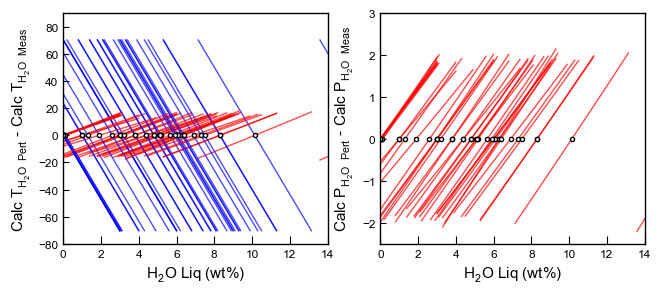

In [11]:
fig, ((ax0, ax1)) = plt.subplots(1,2, 
                                figsize = (7.5,3)) # adjust dimensions 

for i in range(0, np.shape(T_Wang)[1]):
        #plt.plot(H_lin, H_31[:, i]-H_31[0, i], '.k', label="Iterating P and T", alpha=0.3)
    b=1
    liqs=myLiquids1['H2O_Liq'].loc[Filt]
    ax0.plot(delta_H_lin+liqs.iloc[i], T_Wang[:, i]
             -Exp_T_Wang[i],
             '-', color='blue', alpha=0.7, lw=1)

    ax0.plot(delta_H_lin+liqs.iloc[i], T_HSens_eq32d_32b[:, i]-Exp_T_HSens_eq32d_32b[i],
             '-', color='red', alpha=0.7, lw=1)

    
    ax1.plot(delta_H_lin+liqs.iloc[i], P_HSens_eq32d_32b[:, i]-Exp_P_HSens_eq32d_32b[i],
             '-', color='red', alpha=0.7, lw=1)    
      
ax0.plot(Cpx_Glass['H2O_Liq'].loc[Filt],
         Cpx_Glass['H2O_Liq'].loc[Filt]*0,
    'ok', mfc='white', ms=3)

ax1.plot(Cpx_Glass['H2O_Liq'].loc[Filt],
         Cpx_Glass['H2O_Liq'].loc[Filt]*0,
    'ok', mfc='white', ms=3) 

ax0.set_ylabel('Calc T$_{H_{2}O \,\,\,\, Pert}$ - Calc T$_{H_{2}O \,\,\,\, Meas}$')
ax1.set_ylabel('Calc P$_{H_{2}O \,\,\,\, Pert}$ - Calc P$_{H_{2}O \,\,\,\, Meas}$')


ax0.set_xlim([0, 14])
ax1.set_xlim([0, 14])


ax1.yaxis.set_tick_params(which='both', labelbottom=True)
ax0.set_xlabel('H$_2$O Liq (wt%)')
ax1.set_xlabel('H$_2$O Liq (wt%)')
ax0.set_ylim([-80, 90])
ax1.set_ylim([-2.5, 3])
fig.savefig('Cpx_only_H2O_Sens.png', dpi=300)

In [12]:
len(delta_H_lin)

30

## Working out range and average

In [13]:
MaxH2OT_Petrelli2020=T_HSens_eq32d_32b[-1, :]
MinH2OT_Petrelli2020=T_HSens_eq32d_32b[0, :]
Diff_Petrelli2020=MaxH2OT_Petrelli2020-MinH2OT_Petrelli2020

print(np.min(Diff_Petrelli2020)/6)
print(np.max(Diff_Petrelli2020)/6)
print(np.mean(Diff_Petrelli2020)/6)

4.105640505807173
6.1309039344061675
5.132160623330519


In [14]:
MaxH2OT_Petrelli2020=T_Wang[-1, :]
MinH2OT_Petrelli2020=T_Wang[0, :]
Diff_Petrelli2020=MaxH2OT_Petrelli2020-MinH2OT_Petrelli2020

print(np.min(Diff_Petrelli2020)/6)
print(np.max(Diff_Petrelli2020)/6)
print(np.mean(Diff_Petrelli2020)/6)

-23.384000000000015
-23.383999999999975
-23.384


In [15]:
MaxH2OT_Petrelli2020=P_HSens_eq32d_32b[-1, :]
MinH2OT_Petrelli2020=P_HSens_eq32d_32b[0, :]
Diff_Petrelli2020=MaxH2OT_Petrelli2020-MinH2OT_Petrelli2020

print(np.min(Diff_Petrelli2020)/6)
print(np.max(Diff_Petrelli2020)/6)
print(np.mean(Diff_Petrelli2020)/6)

0.5343425724553553
0.7413713254322699
0.6248888574005907
